In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


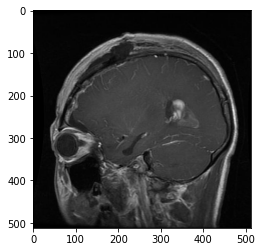

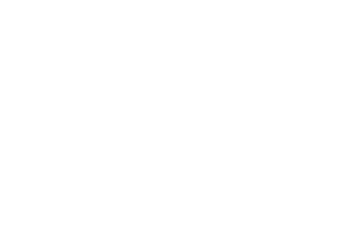

In [ ]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

DATADIR = r"/content/drive/MyDrive/MIT Capstone Project Group 2/Dataset/Training"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break
    break

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(-0.5, 191.5, 191.5, -0.5)

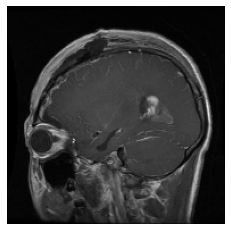

In [ ]:
#Reshaping all the images to 192X192
IMG_SIZE = 192
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [ ]:
#Storing all the training images
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
X_train = []
y_train = []
for features_train,label_train in training_data:
    X_train.append(features_train)
    y_train.append(label_train)
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_train.shape)
X_train = X_train/255.0  
X_train = X_train.reshape(-1,192,192,1)


(2891, 192, 192)


Load the test images in the same way

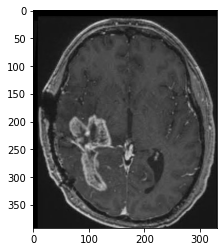

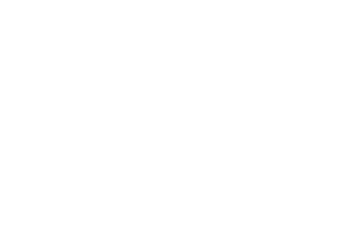

In [ ]:
DATADIR = r"/content/drive/MyDrive/MIT Capstone Project Group 2/Dataset/Testing"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array1 = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array1)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 191.5, 191.5, -0.5)

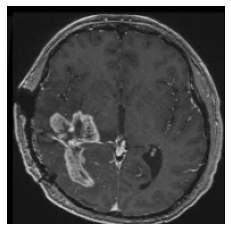

In [ ]:
#Reshaping all the images to 192X192
IMG_SIZE = 192
new_array1 = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array1,cmap = "gray")
plt.axis("off")

In [ ]:
#Storing all the testing images
test_data = []
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array1 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE)) 
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
create_test_data()

In [ ]:

X_test = []
y_test = []
for features_test,label_test in test_data:
    X_test.append(features_test)
    y_test.append(label_test)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_test.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,192,192,1)



(402, 192, 192)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical as ms 

# fix random seed for reproducibility
seed = 7

np.random.seed(seed)

In [ ]:

from keras.datasets import cifar10

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [ ]:
try: # detect TPUs
  tpu = None
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError: # detect GPUs
  strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
  #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines

print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of accelerators:  1


In [ ]:

from tensorflow.keras import losses
from tensorflow.keras import optimizers

import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

IMAGE_SIZE = [192, 192]
with strategy.scope(): # this line is all that is needed to run on TPU (or multi-GPU, ...)

  bnmomemtum=0.9
  def fire(x, squeeze, expand):
    y  = tf.keras.layers.Conv2D(filters=squeeze, kernel_size=1, activation='relu', padding='same')(x)
    y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
    y1 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=1, activation='relu', padding='same')(y)
    y1 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y1)
    y3 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=3, activation='relu', padding='same')(y)
    y3 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y3)
    return tf.keras.layers.concatenate([y1, y3])

  def fire_module(squeeze, expand):
    return lambda x: fire(x, squeeze, expand)

  x = tf.keras.layers.Input(shape=[*IMAGE_SIZE, 3]) # input is 192x192 pixels RGB

  y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=True, activation='relu')(x)
  y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
  y = fire_module(24, 48)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(48, 96)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(64, 128)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(48, 96)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(24, 48)(y)
  y = tf.keras.layers.GlobalAveragePooling2D()(y)
  y = tf.keras.layers.Dense(4, activation='softmax')(y)

  model = tf.keras.Model(x, y)

  

  

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

In [ ]:
from tensorflow import image,convert_to_tensor
x_train_=image.grayscale_to_rgb(
    convert_to_tensor(X_train)
)
x_test_=image.grayscale_to_rgb(
    convert_to_tensor(X_test)
)

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)


      
X_train= np.array(X_train)   
X_test= np.array(X_test)   
y_train= np.array(y_train)
y_test = np.array(y_test)



EPOCHS = 35

# compile the model
opt= tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name="Adam"
  
)

model.compile(
    optimizer=opt
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(x_train_,y_train_encoded, epochs=EPOCHS, 
                    validation_data=(x_test_,y_test_encoded))

Epoch 1/5
91/91 [==============================] - 29s 172ms/step - loss: 0.9214 - accuracy: 0.6302 - val_loss: 1.9247 - val_accuracy: 0.4154
Epoch 2/5
91/91 [==============================] - 13s 142ms/step - loss: 0.5295 - accuracy: 0.8123 - val_loss: 2.6136 - val_accuracy: 0.5000
Epoch 3/5
91/91 [==============================] - 13s 143ms/step - loss: 0.4332 - accuracy: 0.8356 - val_loss: 1.5419 - val_accuracy: 0.5498
Epoch 4/5
91/91 [==============================] - 13s 143ms/step - loss: 0.3706 - accuracy: 0.8616 - val_loss: 2.8721 - val_accuracy: 0.3284
Epoch 5/5
91/91 [==============================] - 13s 143ms/step - loss: 0.3255 - accuracy: 0.8839 - val_loss: 1.7318 - val_accuracy: 0.5697
Epoch 1/35
91/91 [==============================] - 14s 149ms/step - loss: 0.2777 - accuracy: 0.8973 - val_loss: 1.5513 - val_accuracy: 0.5721
Epoch 2/35
91/91 [==============================] - 13s 146ms/step - loss: 0.2728 - accuracy: 0.8955 - val_loss: 2.1556 - val_accuracy: 0.4577
Epoc

In [ ]:
# predict on the test dataset        
# Your code here
y_pred_test = model.predict(x_test_)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac= accuracy_score(y_test, y_pred_test_classes)

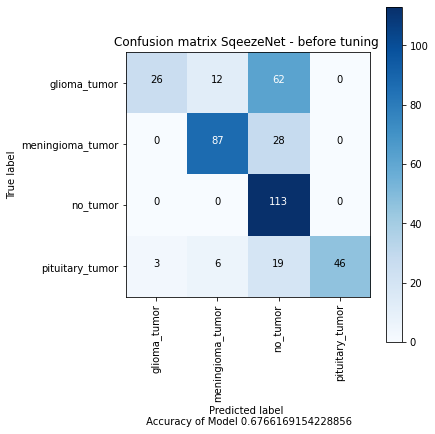

In [ ]:
import itertools
from itertools import chain
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix SqeezeNet - before tuning ',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(CATEGORIES))
    plt.xticks(tick_marks, CATEGORIES, rotation=90)
    plt.yticks(tick_marks, CATEGORIES)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label \n Accuracy of Model '+ str(ac))
    plt.show()


cm=confusion_matrix(y_test, y_pred_test_classes)
plot_confusion_matrix(cm, y_pred_test_classes)

In [ ]:
model.summary()

In [ ]:
# compile the model
opt= tf.keras.optimizers.Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name="Adam"
  
)

model.compile(loss = 'categorical_crossentropy', optimizer= opt , metrics= ["accuracy"])

history = model.fit(x_train_,y_train_encoded, epochs=EPOCHS, 
                    validation_data=(x_test_,y_test_encoded))

Epoch 1/35
91/91 [==============================] - 21s 166ms/step - loss: 0.0069 - accuracy: 0.9998 - val_loss: 2.2013 - val_accuracy: 0.7736
Epoch 2/35
91/91 [==============================] - 14s 150ms/step - loss: 0.0065 - accuracy: 0.9995 - val_loss: 2.2750 - val_accuracy: 0.7736
Epoch 3/35
91/91 [==============================] - 14s 150ms/step - loss: 0.0100 - accuracy: 0.9989 - val_loss: 2.2837 - val_accuracy: 0.7512
Epoch 4/35
91/91 [==============================] - 14s 151ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 2.2451 - val_accuracy: 0.7662
Epoch 5/35
91/91 [==============================] - 14s 151ms/step - loss: 0.0071 - accuracy: 0.9996 - val_loss: 2.3785 - val_accuracy: 0.7562
Epoch 6/35
91/91 [==============================] - 14s 150ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 2.3022 - val_accuracy: 0.7488
Epoch 7/35
91/91 [==============================] - 14s 150ms/step - loss: 0.0090 - accuracy: 0.9994 - val_loss: 2.4161 - val_accuracy: 0.7438

In [ ]:
# predict on the test dataset        
# Your code here
y_pred_test = model.predict(x_test_)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac= accuracy_score(y_test, y_pred_test_classes)

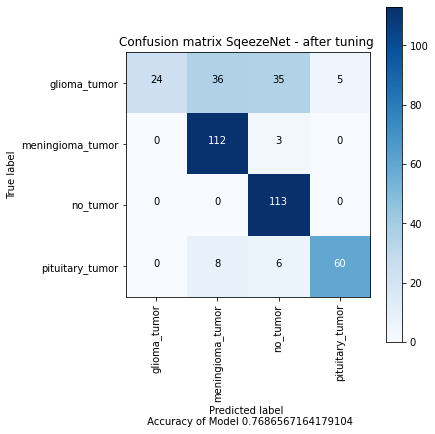

In [ ]:
import itertools
from itertools import chain
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix SqeezeNet - after tuning ',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(CATEGORIES))
    plt.xticks(tick_marks, CATEGORIES, rotation=90)
    plt.yticks(tick_marks, CATEGORIES)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label \n Accuracy of Model '+ str(ac))
    plt.show()


cm=confusion_matrix(y_test, y_pred_test_classes)
plot_confusion_matrix(cm, y_pred_test_classes)